In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TENSORFLOW LIBRARIES NEEDED 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

# sklearn's train test splitter 
from sklearn.model_selection import train_test_split

%matplotlib inline

## Generate the data 

We start by generating the same data as in exercise 4. 

In [2]:
num_points = 30 

x = np.linspace(0,5,num_points)
y = x * np.sin(x) + np.random.normal(loc=0, scale=1, size=num_points)

from sklearn.model_selection import train_test_split
# SPLIT THE DATA TO TRAIN TEST  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


# also generate data of the true function y = x*sin(x) 
x_b = np.linspace(0,5,100)
y_b = x_b*np.sin(x_b)

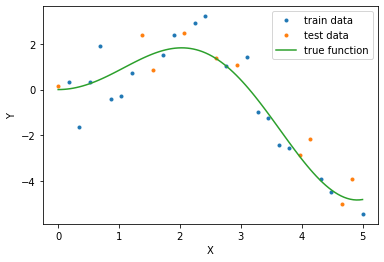

In [3]:
plt.plot(x_train,y_train, '.', label='train data')
plt.plot(x_test,y_test, '.', label='test data')
plt.plot(x_b, y_b, '-', label='true function')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()

And build a FCNN that overfits as in ex4

In [4]:
# I like to name my models 
model_1 = models.Sequential(name='Unregularized')

# hidden layer with 100 neurons 
model_1.add(layers.Dense(100,  activation='tanh', input_shape=(1,)))
model_1.add(layers.Dense(100,  activation='relu'))
model_1.add(layers.Dense(100,  activation='relu'))
model_1.add(layers.Dense(100,  activation='relu'))
model_1.add(layers.Dense(100,  activation='relu'))

# output layer, one neuron 
model_1.add(layers.Dense(1,  activation='linear'))

#model_1.summary()

In [5]:

model_1.compile(loss='MSE',optimizer=optimizers.Adam(learning_rate=0.001)) 
history_1 = model_1.fit(x_train, y_train,  validation_data=(x_test,y_test), epochs=1500, batch_size=10, verbose=0) 


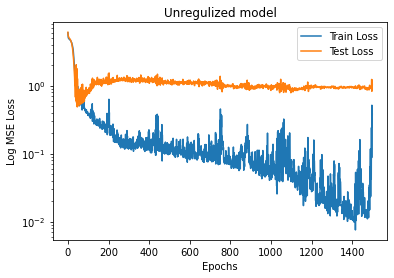

In [6]:
plt.title("Unregulized model")
plt.semilogy(history_1.history['loss'], label='Train Loss')
plt.semilogy(history_1.history['val_loss'],  label='Test Loss')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Log MSE Loss')
plt.legend()

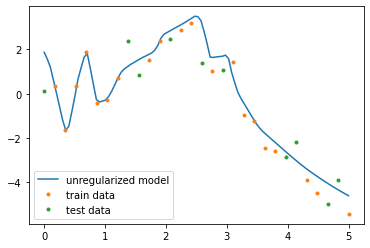

In [7]:
# use the fitted model to predict for x and observe the overfitting 
y_hat_m1 = model_1.predict(x_b)


plt.plot(x_b, y_hat_m1, label = 'unregularized model')
plt.plot(x_train,y_train, '.', label='train data')
plt.plot(x_test,y_test, '.', label='test data')
plt.legend()

## Now let's regularize using Dropout

In [8]:
model_2 = models.Sequential(name='Dropoutegularized')

# hidden layer with 100 neurons (or nodes)
model_2.add(layers.Dense(100, activation='relu', input_shape=(1,)))
model_2.add(layers.Dropout(0.3))
model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(0.3))
model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(0.3))
model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(0.3))
model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(0.3))


# output layer, one neuron 
model_2.add(layers.Dense(1,  activation='linear'))


In [9]:
model_2.compile(loss='MSE',optimizer=optimizers.Adam(learning_rate=0.001)) 
history_2 = model_2.fit(x_train, y_train,  validation_data=(x_test,y_test), epochs=1500, batch_size=10, verbose=0) 


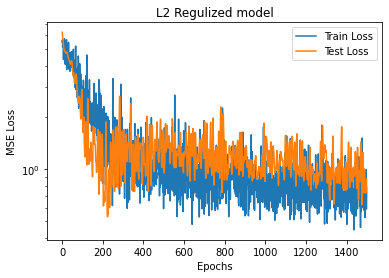

In [10]:
plt.title("L2 Regulized model")
plt.semilogy(history_2.history['loss'], label='Train Loss')
plt.semilogy(history_2.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

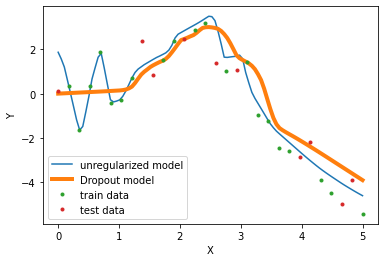

In [11]:
y_hat_dropout = model_2.predict(x_b)




plt.plot(x_b, y_hat_m1, label = 'unregularized model')
plt.plot(x_b, y_hat_dropout, lw=4, label='Dropout model')

plt.plot(x_train,y_train, '.', label='train data')
plt.plot(x_test,y_test, '.', label='test data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()